In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from io import BytesIO



In [25]:
data = pd.read_csv('C:/Users/tarun/OneDrive/Desktop/kmeans/customerdata.csv')

In [26]:
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [27]:
data = data.dropna()

In [28]:
df = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])



In [30]:
df_processed = pd.concat([df_scaled, df['Gender_Male']], axis=1)



In [31]:
# Identify the optimal number of clusters using the elbow method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    wcss.append(kmeans.inertia_)

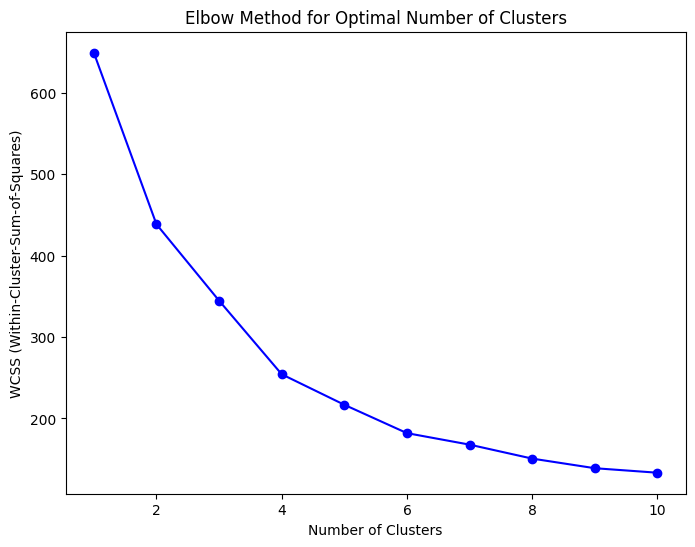

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()


In [35]:
optimal_k = 5  # Replace with the optimal value you identified

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df_processed)

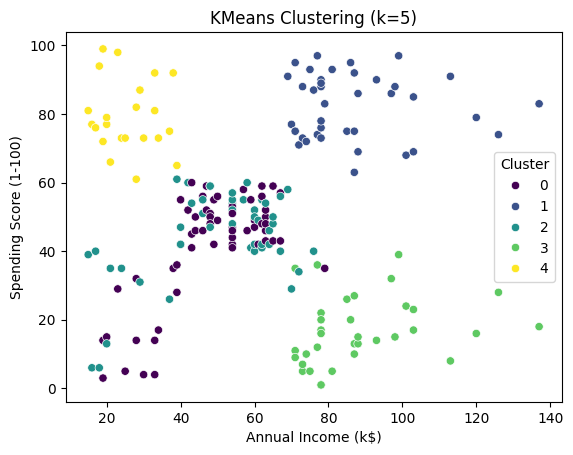

In [36]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

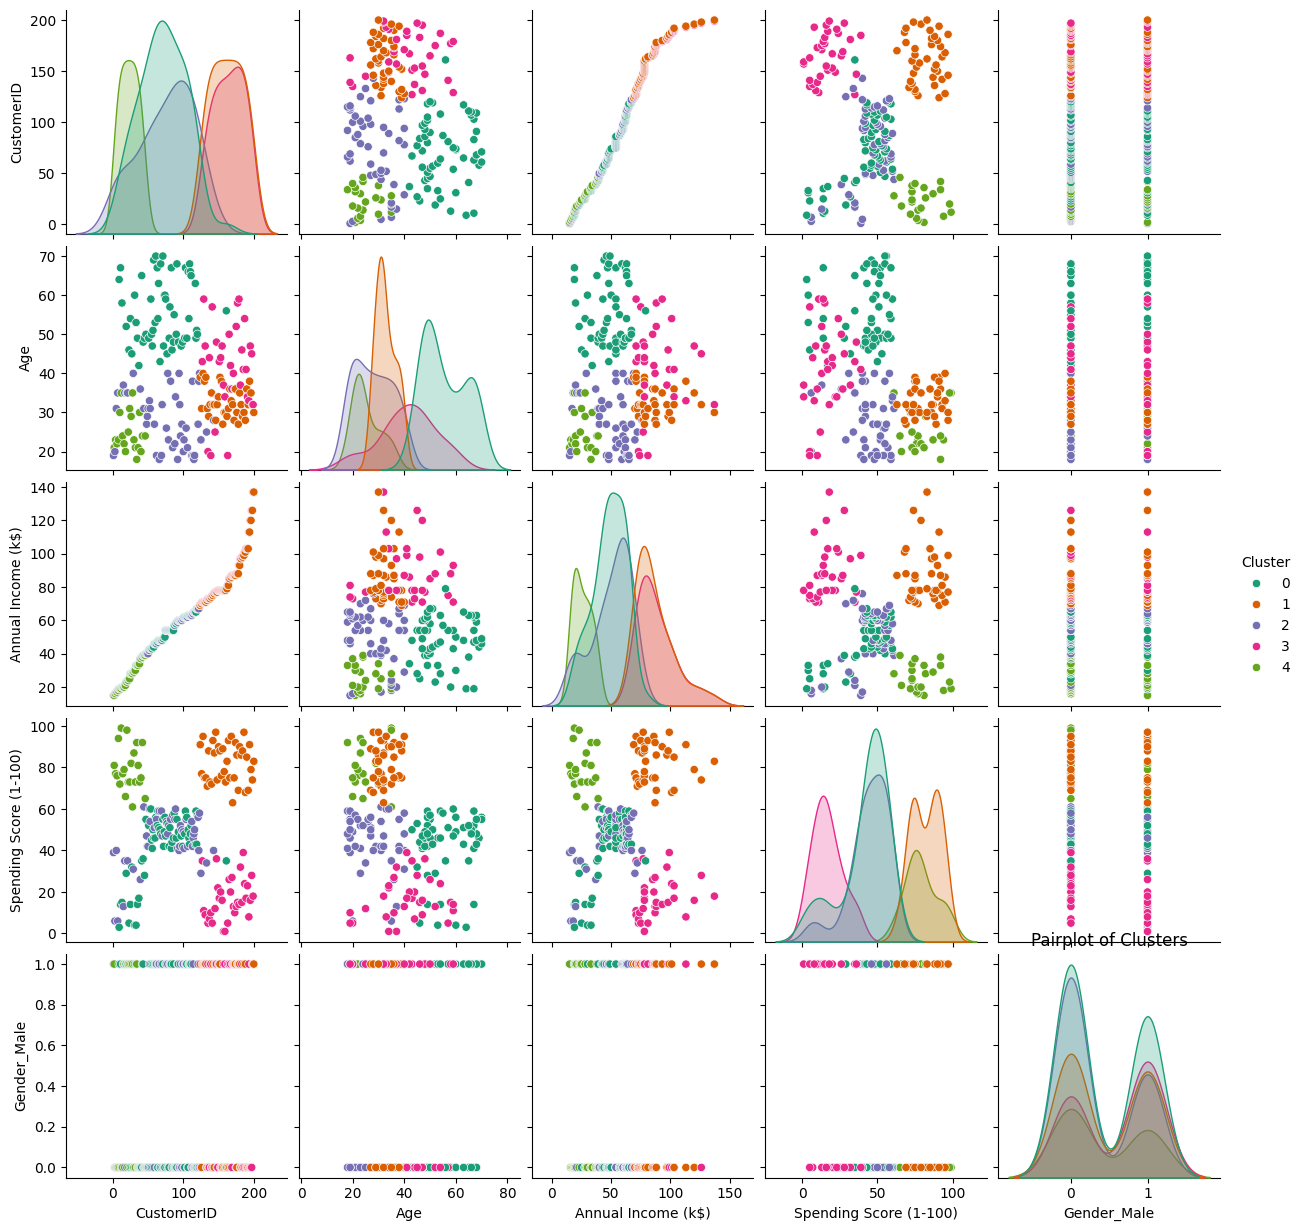

In [39]:
sns.pairplot(data=df, hue='Cluster', palette='Dark2')
plt.title('Pairplot of Clusters')
plt.show()